In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df=pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

k = []
k.extend(df['species'].values)
e = le.fit_transform(k)

df['species'] = e

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X=df.iloc[:,[0,2]]

In [7]:
y = df.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

In [9]:
X_train.shape

(105, 2)

In [10]:
X_test.shape

(45, 2)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf=DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_pred=clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [18]:
X_train

array([[-0.4406795 , -0.02142483],
       [ 0.14355468,  0.54097708],
       [ 0.96148254,  1.0471388 ],
       [ 0.96148254,  0.65345746],
       [-0.55752633, -1.42742961],
       [-0.55752633, -1.31494923],
       [ 0.72778887,  1.10337899],
       [-1.49230102, -1.37118942],
       [ 2.36364457,  1.44082013],
       [ 0.96148254,  0.99089861],
       [ 0.96148254,  1.10337899],
       [-0.09013899,  0.14729574],
       [ 0.8446357 ,  0.31601631],
       [ 0.14355468,  0.3722565 ],
       [-1.25860735, -1.25870904],
       [ 1.19517621,  0.59721727],
       [ 0.14355468,  0.3722565 ],
       [-0.32383266,  0.03481536],
       [ 1.07832937,  0.54097708],
       [ 0.49409519,  1.21585937],
       [ 0.72778887,  0.42849669],
       [-0.90806684, -1.08998847],
       [-0.55752633, -1.20246885],
       [ 0.37724836,  0.3722565 ],
       [-0.20698582,  0.20353593],
       [-1.7259947 , -1.37118942],
       [ 0.26040152,  0.09105555],
       [-0.09013899,  0.70969765],
       [-1.02491368,

In [19]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1, step=0.01)

XX,YY=np.meshgrid(a,b)

In [20]:
XX.shape

(532, 609)

In [21]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=clf.predict(input_array)

In [22]:
labels

array([0, 0, 0, ..., 2, 2, 2])

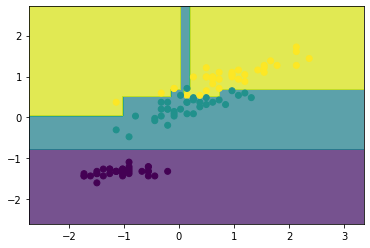

In [23]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)